In [1]:
from get_mesh_modes import *
import seaborn as sb
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import pandas as pd
from stl import mesh

# needed to prevent 3d plots from rendering really small
%config InlineBackend.print_figure_kwargs = {'bbox_inches':None} 

In [2]:
# load vertices and faces for triangular meshes with two different resolutions

# Blair's blender mesh with mesh desnity = 3
verts3 = np.load('nucleus_mesh_data/sample_trimeshes_from_blair/mean_nuc_mesh_uniform_3_vertices.npy')
faces3 = np.load('nucleus_mesh_data/sample_trimeshes_from_blair/mean_nuc_mesh_uniform_3_faces.npy')

# Blair's blender mesh with mesh desnity = 4
verts4 = np.load('nucleus_mesh_data/sample_trimeshes_from_blair/mean_nuc_mesh_uniform_4_vertices.npy')
faces4 = np.load('nucleus_mesh_data/sample_trimeshes_from_blair/mean_nuc_mesh_uniform_4_faces.npy')

# Blair's blender mesh with mesh desnity = 5
verts5 = np.load('nucleus_mesh_data/sample_trimeshes_from_blair/mean_nuc_mesh_uniform_5_vertices.npy')
faces5 = np.load('nucleus_mesh_data/sample_trimeshes_from_blair/mean_nuc_mesh_uniform_5_faces.npy')

# Marhcing cubes mesh with 1060 vertices
verts1060 = np.load('nucleus_mesh_data/marching_cubes_meshes/verts_1060.npy')
faces1060 = np.load('nucleus_mesh_data/marching_cubes_meshes/faces_1060.npy')

# Marhcing cubes mesh with 2538 vertices
verts2538 = np.load('nucleus_mesh_data/marching_cubes_meshes/verts_2538.npy')
faces2538 = np.load('nucleus_mesh_data/marching_cubes_meshes/faces_2538.npy')

# Icosphere mesh desnity = 4
verts_i4 = np.load('nucleus_mesh_data/sample_trimeshes_from_blair/icosphere_4_vertices.npy')
faces_i4 = np.load('nucleus_mesh_data/sample_trimeshes_from_blair/icosphere_4_faces.npy')

# Icosphere mesh desnity = 5
verts_i5 = np.load('nucleus_mesh_data/sample_trimeshes_from_blair/icosphere_5_vertices.npy')
faces_i5 = np.load('nucleus_mesh_data/sample_trimeshes_from_blair/icosphere_5_faces.npy')

In [3]:
def view_mesh_nma_results(verts, faces, save_flag=False, fname=None, bins=None):
    """For a given mesh, scatterplot the vertices, run the NMA code, and histplot the eigenvalues.
    :param verts: mesh vertices
    :param faces: mesh faces
    :param save_flag: T/F flag on whether to save NMA results to files
    :param fname: filename to save NMA results to (only if save_flag=True)
    :param bins: set binning for NMA eigenvalue histplot display
    :return: hessian, eigenvalues, and eigenvectors for NMA
    """
    
    # first, view the vertices of the mesh
    x = [verts[i][0] for i in range(verts.shape[0])]
    y = [verts[i][1] for i in range(verts.shape[0])]
    z = [verts[i][2] for i in range(verts.shape[0])]
    
    fig1 = plt.figure()
    ax1 = fig1.add_subplot(111, projection='3d')
    ax1.scatter(x,y,z, color='k')
    plt.title(str(verts.shape[0])+' Vertex Model')
    plt.savefig(str(verts.shape[0])+'_verts_'+fname)
    plt.savefig(str(verts.shape[0])+'_verts_'+fname+'.pdf', format='pdf')
    plt.show()
    
    hess, w, v = get_eigs_from_mesh(verts, faces, save_flag, fname)
    print(r'Eigenvalues with $\omega^2 < 10^-5$: '+str(np.sum(w<10**-5)))
    
    sb.distplot(w, kde=False, bins=bins, label=str(verts.shape[0])+' Vertices')
    plt.xlabel(r'$\omega^2*m/k$')
    plt.ylabel('Number of Modes')
    plt.legend()
    plt.savefig(str(verts.shape[0])+'_verts_'+fname+'_hist')
    plt.savefig(str(verts.shape[0])+'_verts_'+fname+'_hist.pdf', format='pdf')
    plt.show()
    
    
    return hess, w, v

# First, look at marhcing cubes meshes

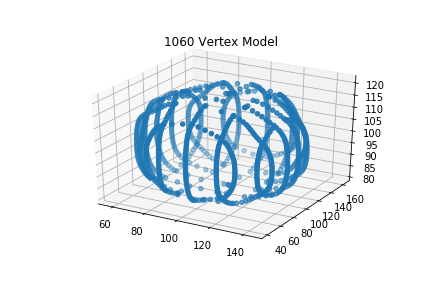

Eigenvalues with w < 10^-5: 18


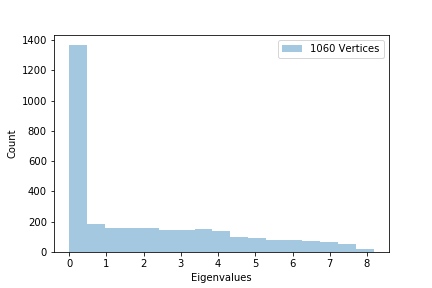

In [4]:
h1060, w1060, v1060 = view_mesh_nma_results(verts1060, faces1060)

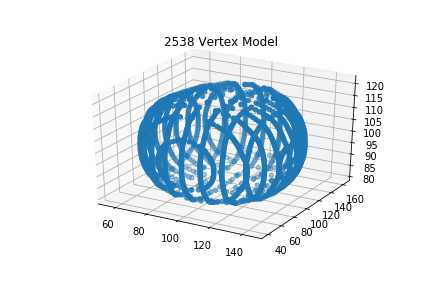

Eigenvalues with w < 10^-5: 61


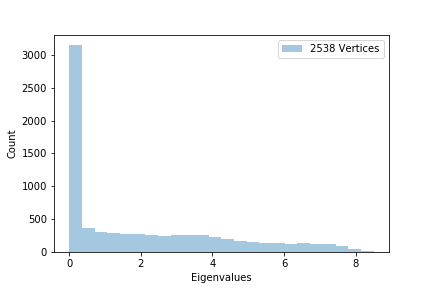

In [5]:
h2538, w2538, v2538 = view_mesh_nma_results(verts2538, faces2538)

# Next, look at meshes genreated with Blair's blender code

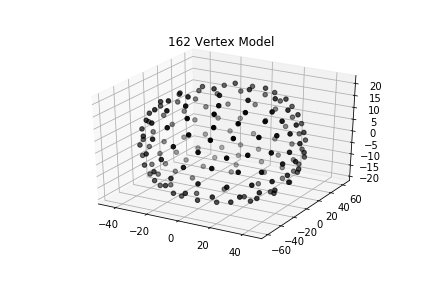

Eigenvalues with $\omega^2 < 10^-5$: 6


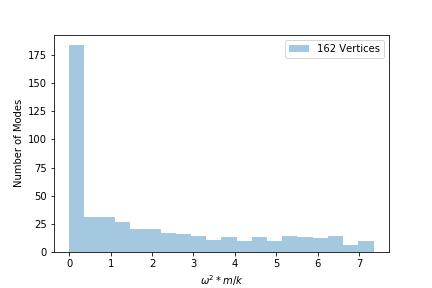

In [4]:
h3, w3, v3 = view_mesh_nma_results(verts3, faces3, save_flag=False, fname='nuc_mesh_3', bins=20)

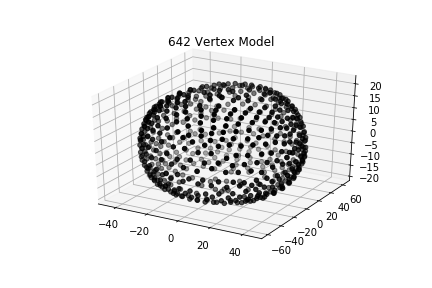

Eigenvalues with $\omega^2 < 10^-5$: 8


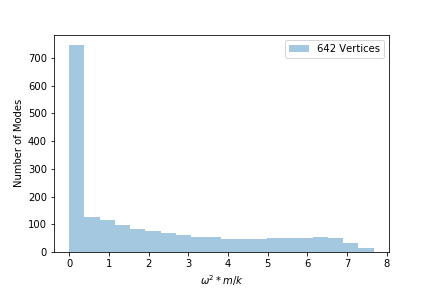

In [5]:
h4, w4, v4 = view_mesh_nma_results(verts4, faces4, save_flag=False, fname='nuc_mesh_4', bins=20)

In [2]:
process_all_eigvecs(res, shape='nuc', v=None, w=None)

FileNotFoundError: [Errno 2] No such file or directory: 'nucleus_nma/eigvecs_nuc_mesh_5.npy'

(array([639.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([3.26224494e-04, 1.00293602e-01, 2.00260980e-01, 3.00228357e-01,
        4.00195735e-01, 5.00163112e-01, 6.00130490e-01, 7.00097867e-01,
        8.00065245e-01, 9.00032622e-01, 1.00000000e+00]),
 <a list of 10 Patch objects>)

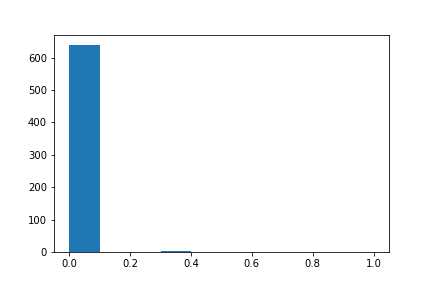

In [22]:
#plt.hist(eigdf['mags'].iloc[6])
#np.save('mesh_4_mode_6',eigdf['mags'].iloc[6])
vals = np.load('mesh_4_mode_6.npy')
plt.hist(vals)

(array([639.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([3.26224494e-04, 1.00293602e-01, 2.00260980e-01, 3.00228357e-01,
        4.00195735e-01, 5.00163112e-01, 6.00130490e-01, 7.00097867e-01,
        8.00065245e-01, 9.00032622e-01, 1.00000000e+00]),
 <a list of 10 Patch objects>)

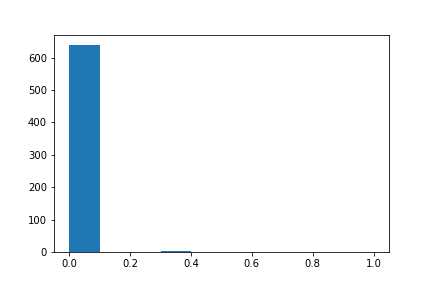

In [17]:
plt.hist(eigdf['mags'].iloc[6])

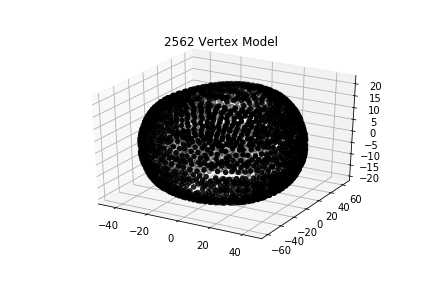

Identical vertices found at indices 386 and 553
Identical vertices found at indices 386 and 553
Identical vertices found at indices 386 and 553
Identical vertices found at indices 386 and 553
Identical vertices found at indices 386 and 553
Identical vertices found at indices 386 and 553
Identical vertices found at indices 386 and 553
Identical vertices found at indices 386 and 553
Identical vertices found at indices 386 and 553
Identical vertices found at indices 386 and 553
Identical vertices found at indices 386 and 553
Identical vertices found at indices 386 and 553
Eigenvalues with $\omega^2 < 10^-5$: 27


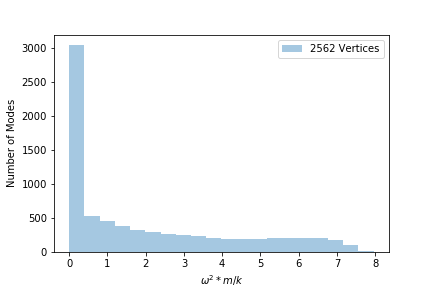

In [4]:
h5, w5, v5 = view_mesh_nma_results(verts5, faces5, save_flag=False, fname='nuc_mesh_5', bins=20)

In [5]:
eigdf = process_all_eigvecs(5, v5, w5)

In [9]:
np.sort(eigdf['mode w'])[0:10]

array([-2.38711113e-16, -1.88401603e-16, -1.13940921e-16, -6.06284087e-17,
       -4.42453377e-17, -1.09906320e-17,  5.34164150e-18,  3.42775409e-08,
        1.69170975e-07,  3.05387854e-07])

# Repeat with spherical meshes

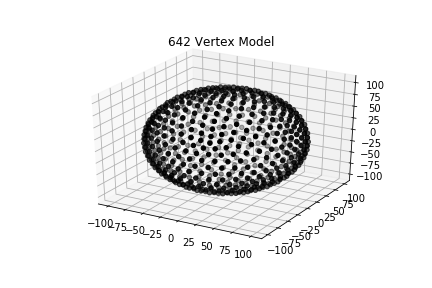

Eigenvalues with $\omega^2 < 10^-5$: 6


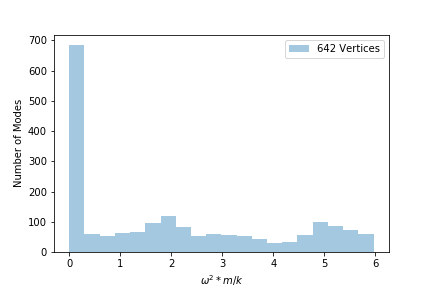

In [4]:
hi4, wi4, vi4 = view_mesh_nma_results(verts_i4, faces_i4, save_flag=False, fname='ico_4', bins=20)

In [5]:
eigendf = process_all_eigvecs(res=4, shape='ico', v=vi4, w=wi4)

In [10]:
mesh = 4
mode = 0
# file = 'mesh_'+str(mesh)+'_mode_'+str(mode)
file = 'ico_mesh_'+str(mesh)+'_mode_'+str(mode)

# setup
local = '/Users/juliec/projects/'   # replace "local_path" with your own repo's local path
local = '/allen/aics/modeling/juliec/projects/'
repo = local+'normal_mode_analysis/normal_mode_analysis/' 

# input mesh file path
# mesh_input_file_path = repo+'nucleus_mesh_data/sample_trimeshes_from_blair/mean_nuc_mesh_uniform_'+str(mesh)'.stl'
mesh_input_file_path = repo+'nucleus_mesh_data/sample_trimeshes_from_blair/icosphere_'+str(mesh)+'.stl'

# results file path
output_file_path = repo+'nucleus_nma_heatmaps/'+file+'_colored.blend'

# input eigvec coloring values
# eigvec_data = pd.read_pickle(repo+'nucleus_nma/mode_table_nuc_mesh_'+str(mesh)'.pickle')
eigvec_data = pd.read_pickle(repo+'nucleus_nma/mode_table_ico_mesh_'+str(mesh)+'.pickle')
# colors_input_file_path = repo+'nucleus_nma/'+file+'_mags.npy'
colors_input_file_path = repo+'nucleus_nma/'+file+'_mags.npy'
vecs = np.save(colors_input_file_path, eigvec_data.iloc[mode]['mags'])

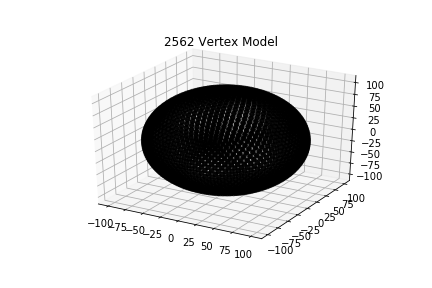

KeyboardInterrupt: 

In [4]:
hi5, wi5, vi5 = view_mesh_nma_results(verts_i5, faces_i5, save_flag=False, fname='ico_5', bins=20)

In [3]:
df = pd.read_pickle('nucleus_nma/mode_table_nuc_mesh_4.pickle')

In [4]:
df.head()

,vecs,mags,mode w
0,"[[0.04666023148877352, 0.00018120160187927502,...","[0.9107200251597589, 0.9778311116113431, 0.918...",-2.586450e-16
1,"[[0.0, -0.014835056742547002, 0.03300139010072...","[0.5242764486397707, 0.9329660233343013, 0.750...",-5.631853e-17
2,"[[0.0, -0.013968267253354164, -0.0179062039035...","[0.3087137388929783, 0.17602447246996564, 0.29...",2.958448e-17
3,"[[3.031034884588963e-10, -0.0340642141826014, ...","[0.7054461184082138, 0.7403688528114476, 0.797...",9.068933e-17
4,"[[0.0, -0.006527202252510295, -0.0072588745699...","[0.18283620008431464, 0.7685741274755136, 0.84...",1.158395e-16


(array([31., 31., 24., 33., 28., 33., 29., 34., 26., 30., 30., 30., 31.,
        35., 33., 34., 31., 41., 38., 40.]),
 array([0.18057935, 0.22155038, 0.26252142, 0.30349245, 0.34446348,
        0.38543451, 0.42640555, 0.46737658, 0.50834761, 0.54931864,
        0.59028968, 0.63126071, 0.67223174, 0.71320277, 0.75417381,
        0.79514484, 0.83611587, 0.8770869 , 0.91805794, 0.95902897,
        1.        ]),
 <a list of 20 Patch objects>)

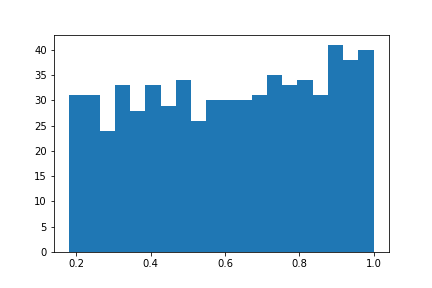

In [11]:
# look at vector histogram
mode = 5
vecs = df.iloc[mode]['mags']
plt.hist(vecs, bins = 20)

(array([367., 135.,  57.,  38.,  13.,   7.,  11.,   5.,   4.,   1.,   1.,
          1.,   0.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
        0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
        0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
        0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
 <a list of 19 Patch objects>)

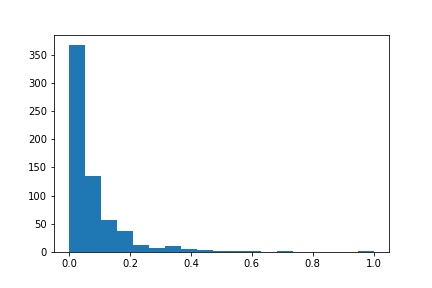

In [25]:
mode = 400
vecs = df.iloc[mode]['mags']
plt.hist(vecs, bins = np.linspace(0, 1, 20))